In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import matplotlib.pylab as plts
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.cluster as cluster
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Add parent directory to path to import modules from src
import os, sys
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)
import src.utils as utils
import src.sql as sql
import src.plots as plot

In [4]:
# all_data_path = '../data/'
# df = utils.load_json_data(all_data_path)
# df = pd.DataFrame(df[0])
# df.head()

In [5]:
alconn = sql.db_connection_sqlalchemy()
df = sql.db_read_table_sqlalchemy(alconn)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [7]:
utils.percent_missing(df)

('The telco dataset contains', 12.5, '%', 'missing values.')

In [8]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [9]:
# count of missing values
df.isna().sum() / df.shape[0] * 100

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [10]:
# drop table columns with a lot of missing values
df = df.drop(['IMSI', 'IMEI', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [11]:
# replace the missing value
df = utils.repalce_missing_values(df)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),MSISDN/Number,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,3.366496e+10,9.16456699548519E+015,42.0,5.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,36749741.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,3.368185e+10,L77566A,65.0,5.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,53800391.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,3.376063e+10,D42335A,28.0,5.0,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,27883638.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,3.375034e+10,T21824A,28.0,5.0,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,43324218.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,3.369980e+10,D88865A,28.0,5.0,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,38542814.0


In [12]:
# count of missing values
df.isna().sum() / df.shape[0] * 100

Bearer Id                         0.0
Start                             0.0
Start ms                          0.0
End                               0.0
End ms                            0.0
Dur. (ms)                         0.0
MSISDN/Number                     0.0
Last Location Name                0.0
Avg RTT DL (ms)                   0.0
Avg RTT UL (ms)                   0.0
Avg Bearer TP DL (kbps)           0.0
Avg Bearer TP UL (kbps)           0.0
TCP DL Retrans. Vol (Bytes)       0.0
TCP UL Retrans. Vol (Bytes)       0.0
DL TP < 50 Kbps (%)               0.0
50 Kbps < DL TP < 250 Kbps (%)    0.0
250 Kbps < DL TP < 1 Mbps (%)     0.0
DL TP > 1 Mbps (%)                0.0
UL TP < 10 Kbps (%)               0.0
10 Kbps < UL TP < 50 Kbps (%)     0.0
50 Kbps < UL TP < 300 Kbps (%)    0.0
UL TP > 300 Kbps (%)              0.0
Activity Duration DL (ms)         0.0
Activity Duration UL (ms)         0.0
Dur. (ms).1                       0.0
Handset Manufacturer              0.0
Handset Type

In [13]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.015806e+19,499.189512,498.799735,1.046085e+05,4.182414e+10,94.620523,15.315031,13299.957414,1770.417111,2.080991e+07,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112106e+07,4.112106e+07
std,2.893178e+18,288.611320,288.097034,8.103735e+04,2.438731e+12,560.245617,76.687998,23971.823147,4625.342240,1.172356e+08,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127649e+07,1.127649e+07
min,6.917538e+18,0.000000,0.000000,7.142000e+03,3.360100e+10,0.000000,0.000000,0.000000,0.000000,2.000000e+00,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,2.866892e+06
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,3.365094e+10,28.000000,3.000000,43.000000,47.000000,1.332932e+06,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322196e+07,3.322196e+07
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,3.366361e+10,38.000000,5.000000,63.000000,63.000000,2.080991e+07,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.114324e+07
75%,1.304243e+19,749.000000,750.000000,1.324300e+05,3.368307e+10,62.000000,11.000000,19710.000000,1120.000000,2.080991e+07,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,4.903424e+07
max,1.318654e+19,999.000000,999.000000,1.859336e+06,8.823971e+14,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,7.833131e+07


In [14]:
sessions_count = df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='Number of xDR Sessions')
print(sessions_count)

        MSISDN/Number  Number of xDR Sessions
0        3.360100e+10                       1
1        3.360100e+10                       1
2        3.360100e+10                       1
3        3.360101e+10                       1
4        3.360101e+10                       2
...               ...                     ...
106851   3.379000e+10                       1
106852   3.379000e+10                       1
106853   3.197021e+12                       1
106854   3.370000e+14                       1
106855   8.823971e+14                       1

[106856 rows x 2 columns]


## Data Scaling

standardization

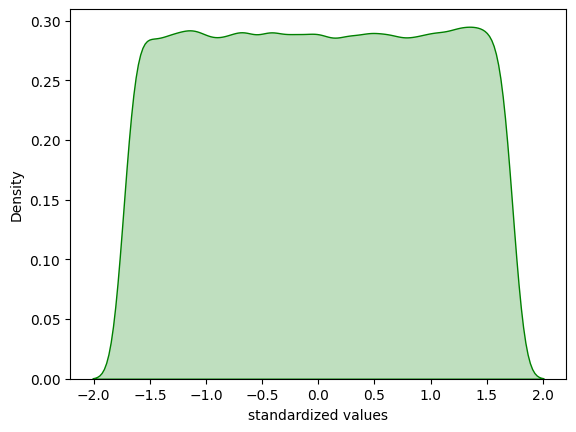

In [15]:
#define the columns 
# Defines a list of column names called cols. This list represents the column names you want to select from the DataFrame df.

# Creates an instance of the StandardScaler class from the sklearn.preprocessing module. The StandardScaler is a preprocessing class used to standardize features by removing the mean and scaling them to unit variance.

# Uses the fit_transform method of the StandardScaler instance to standardize the values of the selected columns (df[cols].iloc[:, range(0,7)].values). The fit_transform method calculates the mean and standard deviation of the data and scales it accordingly.

# Uses the sns.kdeplot function from the Seaborn library to create a Kernel Density Estimation (KDE) plot. The plot represents the distribution of the standardized values of the 6th column (Stand_Sc[:, 5]).

# Sets the x-label of the plot to 'standardized values' using plt.xlabel.

# Displays the plot using plt.show().
 
cols = ['Bearer Id', 'Dur. (ms)', 'MSISDN/Number','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Social Media DL (Bytes)','Social Media UL (Bytes)',
        'Google DL (Bytes)','Google UL (Bytes)' , 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Total UL (Bytes)' , 'Total DL (Bytes)']
 
#call the standard scaler 
std_scaler = StandardScaler()
 
#fit the values to the function 
Stand_Sc = std_scaler.fit_transform(df[cols].values)
#Stand_Sc = std_scaler.fit_transform(df[cols].iloc[:,range(0,7)].values)
 
#use seaborn for KDE plot
sns.kdeplot(Stand_Sc[:,5],fill=True, color = 'Green')
 
#Label the plot 
plt.xlabel('standardized values')
 
#Print the plot 
plt.show()

Normalization

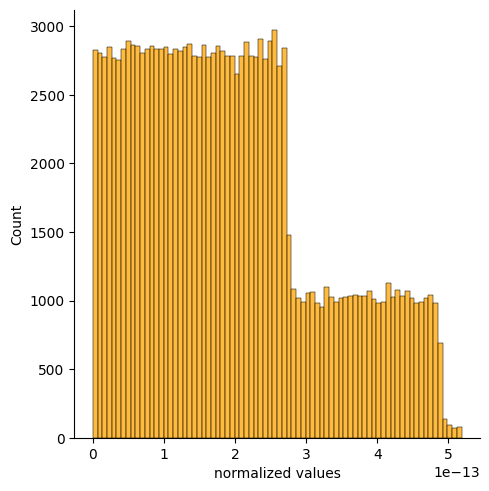

In [16]:
#initialize normalizer
# Normalization is a data preprocessing technique that scales numeric features to a common range and ensures that they have similar magnitudes. 
# It is commonly used when the magnitude or scale of different features varies significantly in a dataset.
data_norm = Normalizer()
 
#Fit the data
# Normalize = data_norm.fit_transform(df[cols].values)
Normalize = data_norm.fit_transform(df[cols].iloc[:,range(0,7)].values)
 
#Distribution plot 
sns.displot(Normalize[:,5],fill=True, color = 'orange')
 
#Add the axis labels 
plt.xlabel('normalized values')
 
#Display the plot 
plt.show()

## Extracting Data

In [17]:
# The top 10 Handset Types used by customers
ht = df["Handset Type"].value_counts()
ht[:10]

Handset Type
Huawei B528S-23A                19752
undefined                        9559
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [18]:
# The top 10 Handset Manufacturer types used by customers
hm = df["Handset Manufacturer"].value_counts()
hm[:3]

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [19]:
# The top 5 handsets per top 3 handset manufacturer
Manu_grp = df.groupby(["Handset Manufacturer"])
top_manufacturers = Manu_grp.size().sort_values(ascending=False).head(3).index
# top_manufacturers
for manufacturer in top_manufacturers:
    manufacturer_group = Manu_grp.get_group(manufacturer)
    top_handsets = manufacturer_group["Handset Type"].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:")
    print(top_handsets)
    print()

Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64



based on the data we get above I can recommend the marketing team to act accordingly

Apple:

The Apple iPhone 6S (A1688), Apple iPhone 6 (A1586), and Apple iPhone 7 (A1778) are the top handsets for Apple.
Recommendation: Since these models have high popularity, marketing teams can focus on promoting the latest models from Apple, to maintain the brand's appeal and attract new customers.

Samsung:

The Samsung Galaxy S8 (Sm-G950F), Samsung Galaxy A5 Sm-A520F, and Samsung Galaxy J5 (Sm-J530) are the top handsets for Samsung.
Recommendation: Samsung's flagship models like the Galaxy S series have a strong presence. To capitalize on this, marketing teams can highlight the key features and advancements of the latest Galaxy S models to entice existing Samsung users to upgrade and attract new customers.

Huawei:

The Huawei B528S-23A, Huawei E5180, and Huawei P20 Lite Huawei Nova 3E are the top handsets for Xiaomi.
Recommendation: Huwaei's series, especially the Huawei B528S-23A, is gaining popularity. Marketing teams can emphasize the value for money and feature-rich nature of the huwaei series to target budget-conscious consumers. 

Aggregate per user the following information in the column 

In [20]:
# by the number of xDR sessions
user_sessions = df.groupby("MSISDN/Number")
sessions_count = user_sessions.size()
sessions_count = sessions_count.sort_values(ascending=False)
sessions_count

MSISDN/Number
3.362632e+10    1084
3.362578e+10      17
3.361489e+10      17
3.365973e+10      16
3.376054e+10      15
                ... 
3.366068e+10       1
3.366068e+10       1
3.366067e+10       1
3.366067e+10       1
8.823971e+14       1
Length: 106856, dtype: int64

In [21]:
# by the Session duration, the total download (DL) and upload (UL) data
session_duration = user_sessions["Dur. (ms)"].sum()
total_downloads = user_sessions["Total DL (Bytes)"].sum()
total_uploads = user_sessions["Total UL (Bytes)"].sum()
print(f"by the session duration:")
print(session_duration)
print('')
print(f"by the total downloads:")
print(total_downloads)
print('')
print(f"by the total uploads:")
print(total_uploads)

by the session duration:
MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

by the total downloads:
MSISDN/Number
3.360100e+10    36053108.0
3.360100e+10    36104459.0
3.360100e+10    39306820.0
3.360101e+10    20327526.0
3.360101e+10    94280527.0
                   ...    
3.379000e+10    26716429.0
3.379000e+10    35732243.0
3.197021e+12    37295915.0
3.370000e+14    56652839.0
8.823971e+14    60456049.0
Name: Total DL (Bytes), Length: 106856, dtype: float64

by the total uploads:
MSISDN/Number
3.360100e+10    36053108.0
3.360100e+10    36104459.0
3.360100e+10    39306820.0
3.360101e+10    20327526.0
3.360101e+10    94280527.0
                   ...    
3.379000e+10    26716429.0
3.379000e+10    35732

In [22]:
total_data_volume = user_sessions[["Social Media DL (Bytes)", "Social Media UL (Bytes)",
                                  "Google DL (Bytes)", "Google UL (Bytes)",
                                  "Email DL (Bytes)", "Email UL (Bytes)",
                                  "Youtube DL (Bytes)", "Youtube UL (Bytes)",
                                  "Netflix DL (Bytes)", "Netflix UL (Bytes)",
                                  "Gaming DL (Bytes)", "Gaming UL (Bytes)",
                                  "Other DL (Bytes)", "Other UL (Bytes)"]].sum()

In [23]:
total_data_volume.head()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0


## Univariate Analysis

In [24]:
# # Select relevant columns
# app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
#                'Google DL (Bytes)', 'Google UL (Bytes)',
#                'Email DL (Bytes)', 'Email UL (Bytes)',
#                'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
#                'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
#                'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
#                'Other DL (Bytes)', 'Other UL (Bytes)']

# # Create new columns for total bytes for each application
# for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other', 'Total']:
#     cleaned_data[f'{app} Total Bytes'] = cleaned_data[f'{app} DL (Bytes)'] + cleaned_data[f'{app} UL (Bytes)']

# # Select only the new total bytes columns
# total_bytes_columns = [f'{app} Total Bytes' for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']]
# total_bytes_data = cleaned_data[total_bytes_columns]

# # Calculate correlation matrix for total bytes
# corr_matrix_total_bytes = total_bytes_data.corr()

# # Plot heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix_total_bytes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix for Total Bytes')
# plt.show()

In [25]:
# import plotly.io as pio
# fig = plot.scatter(df, x='Total UL and DL', y="time_duration", color='Cluster', size='sessions')
# Image(pio.to_image(fig, format='png', width=1200))

array([[<Axes: title={'center': 'Bearer Id'}>,
        <Axes: title={'center': 'Start ms'}>,
        <Axes: title={'center': 'End ms'}>,
        <Axes: title={'center': 'Dur. (ms)'}>,
        <Axes: title={'center': 'MSISDN/Number'}>,
        <Axes: title={'center': 'Avg RTT DL (ms)'}>],
       [<Axes: title={'center': 'Avg RTT UL (ms)'}>,
        <Axes: title={'center': 'Avg Bearer TP DL (kbps)'}>,
        <Axes: title={'center': 'Avg Bearer TP UL (kbps)'}>,
        <Axes: title={'center': 'TCP DL Retrans. Vol (Bytes)'}>,
        <Axes: title={'center': 'TCP UL Retrans. Vol (Bytes)'}>,
        <Axes: title={'center': 'DL TP < 50 Kbps (%)'}>],
       [<Axes: title={'center': '50 Kbps < DL TP < 250 Kbps (%)'}>,
        <Axes: title={'center': '250 Kbps < DL TP < 1 Mbps (%)'}>,
        <Axes: title={'center': 'DL TP > 1 Mbps (%)'}>,
        <Axes: title={'center': 'UL TP < 10 Kbps (%)'}>,
        <Axes: title={'center': '10 Kbps < UL TP < 50 Kbps (%)'}>,
        <Axes: title={'center': '

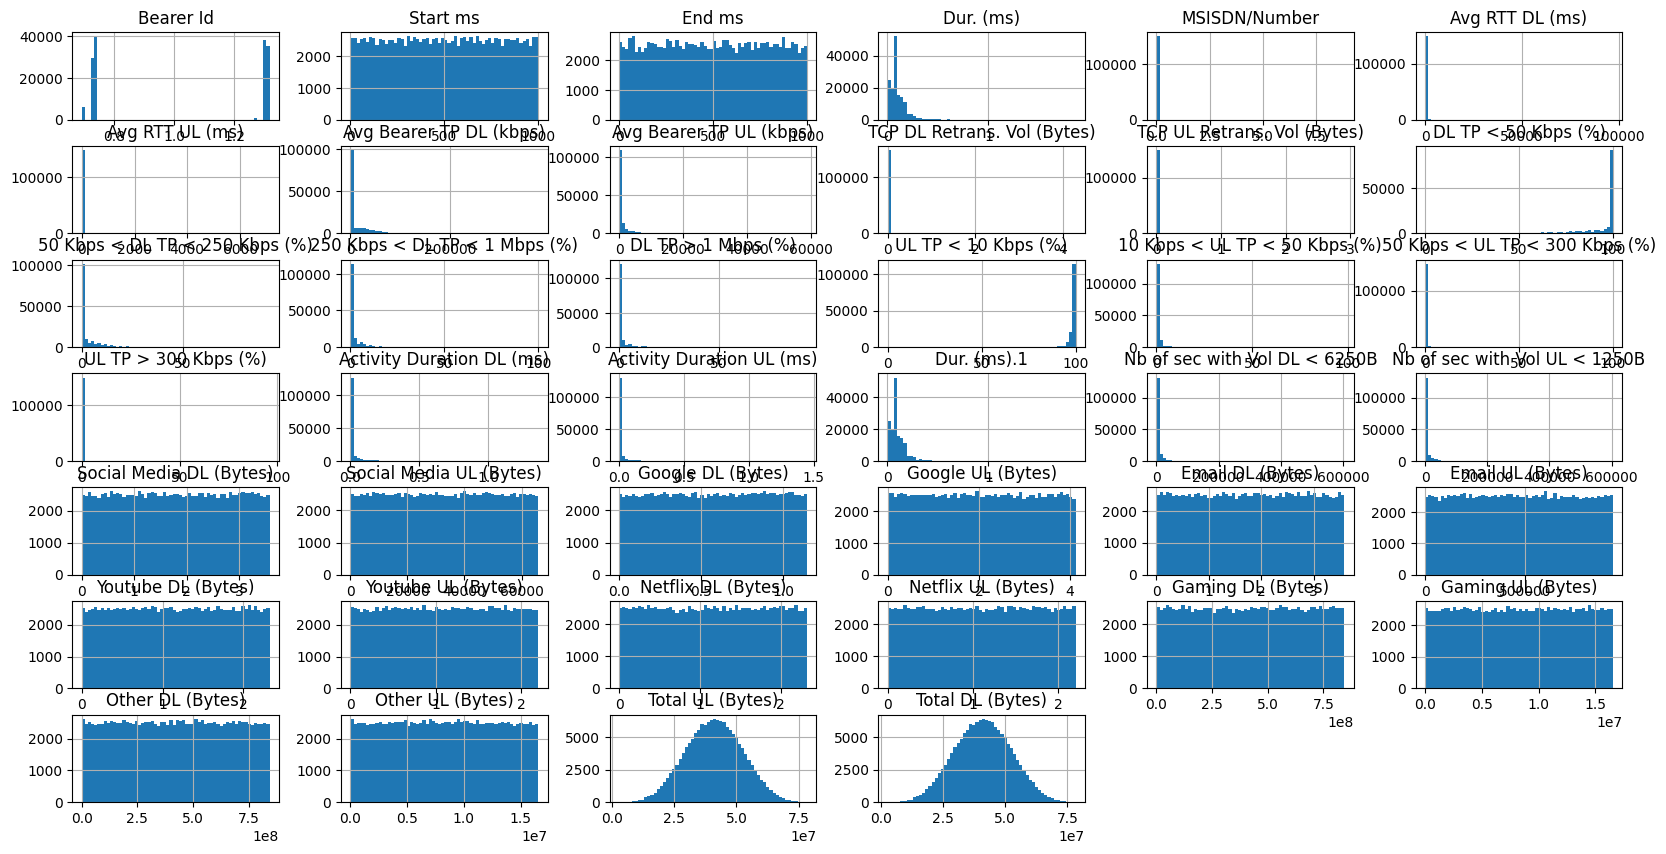

In [26]:
df.hist(bins=60,figsize=(20,10))

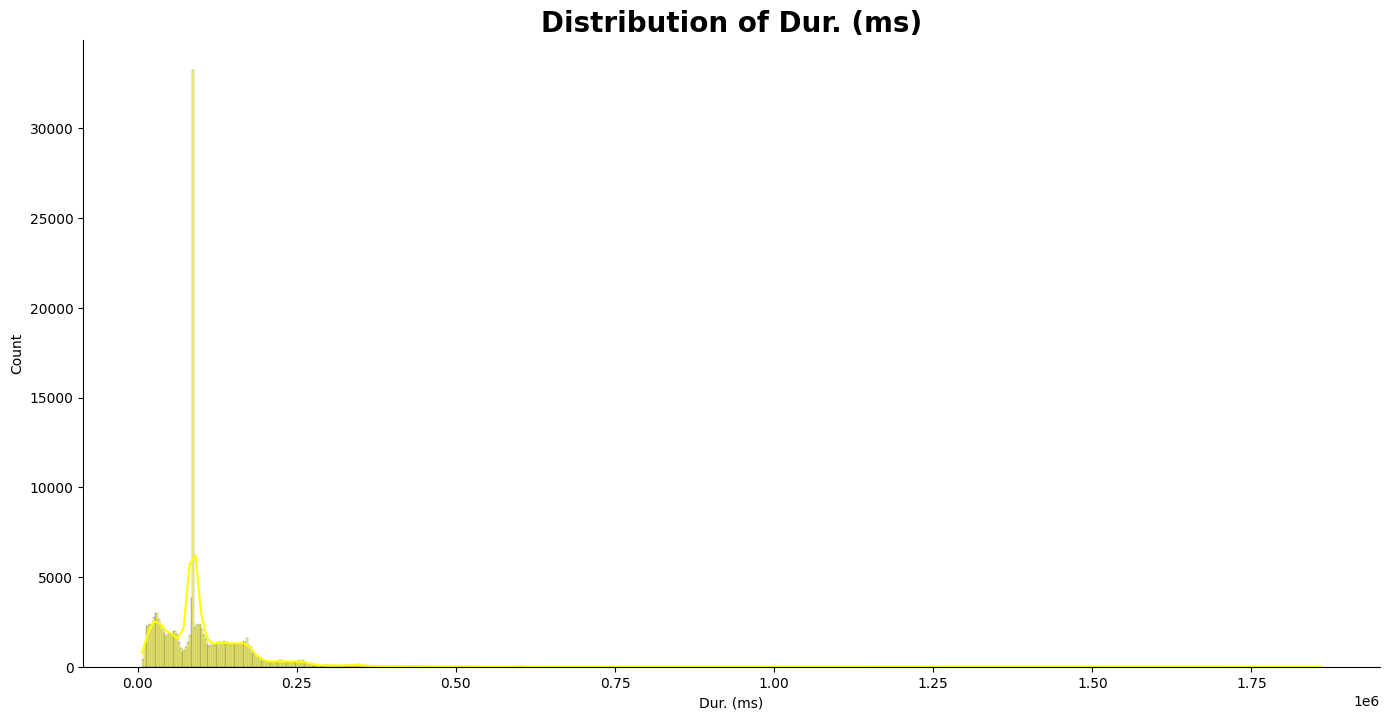

In [27]:
### with outliter
plot.plot_hist(df, "Dur. (ms)", "yellow")

In [28]:
#### after outlier removed
df['Dur. (ms)']=plot.fix_outlier(df,'Dur. (ms)')


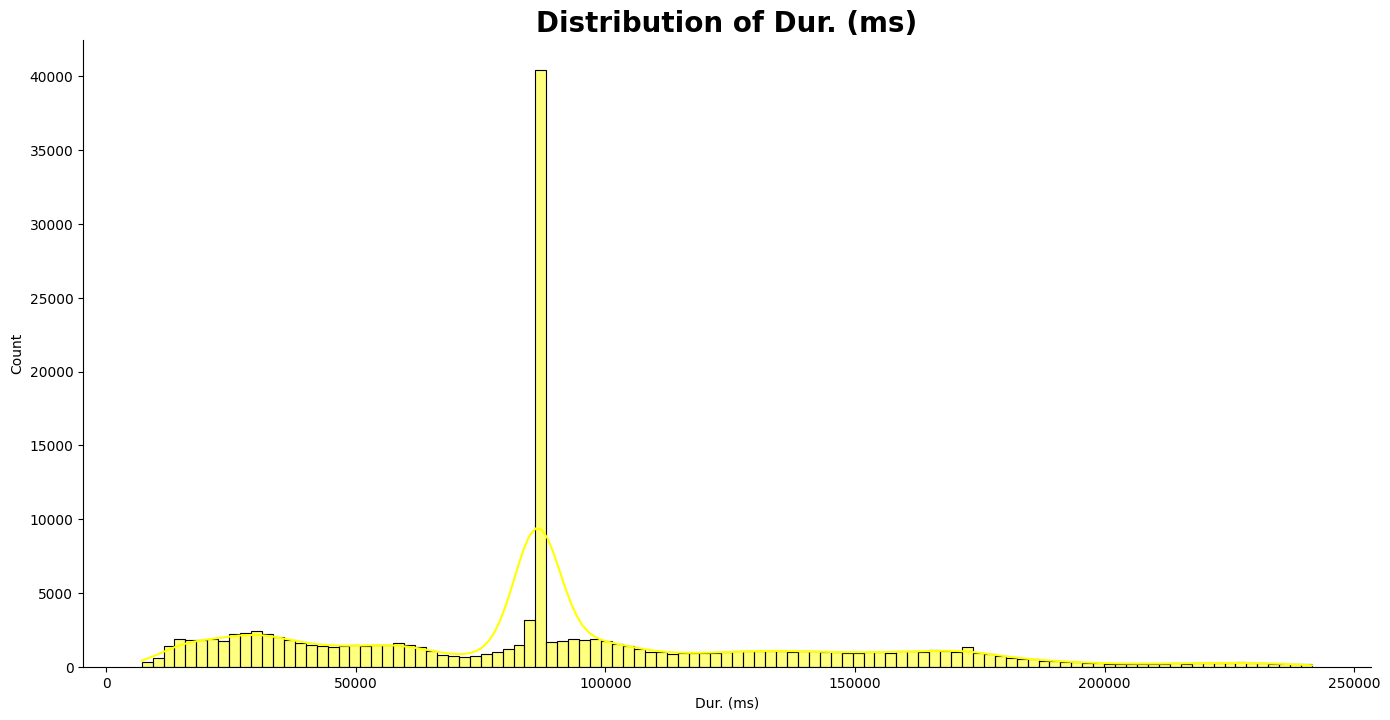

In [29]:
plot.plot_hist(df, "Dur. (ms)", "yellow")

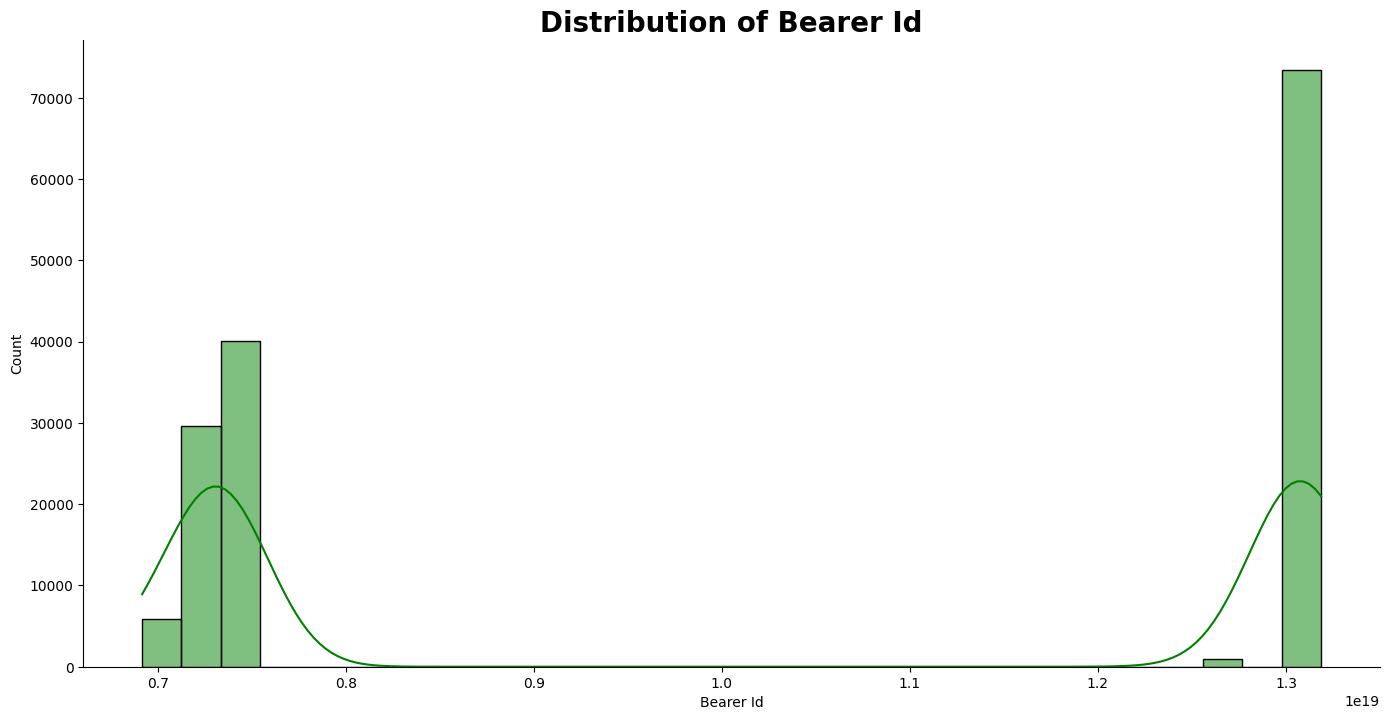

In [30]:
### No outliers
plot.plot_hist(df, "Bearer Id", "green")

In [31]:
# Checking for outlier for the bearer id of the dataframe for the above graph with the original data
# df['Bearer Id']=plot.fix_outlier(df,'Bearer Id')
# plot.plot_hist(df, "Bearer Id", "green")

## Engagement Metrics

In [32]:
# track the user’s engagement using the following engagement metrics: sessions frequency 
sessions_frequency = df['Bearer Id'].nunique()
sessions_frequency_val = df['Bearer Id'].unique()
print(sessions_frequency)
print(sessions_frequency_val)


134708
[1.31144835e+19 1.31144835e+19 1.31144835e+19 ... 7.27782567e+18
 7.34988326e+18 1.31144836e+19]


In [33]:
# track the user’s engagement using the following engagement metrics: the duration of the session 

# Convert 'Start' and 'End' columns to datetime type
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
# Calculate session duration in seconds
df['Session Duration'] = (df['End'] - df['Start']).dt.total_seconds()
# Print the session duration
df['Session Duration']

0         1823640.0
1         1365060.0
2         1361760.0
3         1321500.0
4         1089000.0
            ...    
149996      81240.0
149997      97980.0
149998      98280.0
149999      97920.0
150000      97920.0
Name: Session Duration, Length: 150001, dtype: float64

In [34]:
# track the user’s engagement using the following engagement metrics: the sessions total traffic (download and upload (bytes))
df['Sessions Total Traffic'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
df['Sessions Total Traffic']

0          73499482.0
1         107600782.0
2          55767276.0
3          86648436.0
4          77085628.0
             ...     
149996    115257702.0
149997     78270162.0
149998     69824448.0
149999     59252192.0
150000     38724918.0
Name: Sessions Total Traffic, Length: 150001, dtype: float64

In [35]:
# Calculate aggregated metrics per user
aggregated_metrics = df.groupby('Bearer Id').agg({
    'Session Duration': 'sum',
    'Sessions Total Traffic': 'sum'
})

# Print the calculated engagement metrics
print("Sessions Frequency:", sessions_frequency)
print("\nAggregated Metrics:")
print(aggregated_metrics)

Sessions Frequency: 134708

Aggregated Metrics:
              Session Duration  Sessions Total Traffic
Bearer Id                                             
6.917538e+18           24540.0              83409220.0
6.917538e+18           21480.0              77387192.0
6.917538e+18           27780.0              31097852.0
6.917538e+18           15660.0              99211376.0
6.917538e+18           24300.0              43966926.0
...                        ...                     ...
1.318654e+19           80040.0              70825328.0
1.318654e+19          145260.0              72379174.0
1.318654e+19           86400.0              71838920.0
1.318654e+19           86400.0              81755352.0
1.318654e+19          103080.0              92295116.0

[134708 rows x 2 columns]


In [36]:
# Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 
# Calculate aggregated metrics per 'MSISDN'
aggregated_metrics = df.groupby('MSISDN/Number').agg({
    'Session Duration': 'sum',
    'Sessions Total Traffic': 'sum'
})

# Sort by each engagement metric and get the top 10 customers
top_10_duration = aggregated_metrics.sort_values('Session Duration', ascending=False).head(10)
top_10_traffic = aggregated_metrics.sort_values('Sessions Total Traffic', ascending=False).head(10)

print("Top 10 Customers by Session Duration:")
print(top_10_duration)

print("\nTop 10 Customers by Sessions Total Traffic:")
print(top_10_traffic)

Top 10 Customers by Session Duration:
               Session Duration  Sessions Total Traffic
MSISDN/Number                                          
3.362632e+10         81337920.0            9.002863e+10
3.362578e+10         18553740.0            1.459155e+09
3.361489e+10          9967200.0            1.378966e+09
3.376054e+10          9279660.0            1.406957e+09
3.366716e+10          8744580.0            1.132653e+09
3.366284e+10          6614160.0            8.128487e+08
3.366469e+10          6288540.0            8.043616e+08
3.360313e+10          6288000.0            8.711753e+08
3.366746e+10          5650080.0            5.324453e+08
3.376041e+10          5321820.0            1.043038e+09

Top 10 Customers by Sessions Total Traffic:
               Session Duration  Sessions Total Traffic
MSISDN/Number                                          
3.362632e+10         81337920.0            9.002863e+10
3.362578e+10         18553740.0            1.459155e+09
3.376054e+10         

In [37]:
# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 
# Normalize engagement metrics
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(df[['Session Duration', 'Sessions Total Traffic']])
df['Normalized Session Duration'] = normalized_metrics[:, 0]
df['Normalized Sessions Total Traffic'] = normalized_metrics[:, 1]

# Run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Engagement Group'] = kmeans.fit_predict(normalized_metrics)

# Print the customer classification
print(df[['MSISDN/Number', 'Engagement Group']])

        MSISDN/Number  Engagement Group
0        3.366496e+10                 0
1        3.368185e+10                 2
2        3.376063e+10                 1
3        3.375034e+10                 0
4        3.369980e+10                 0
...               ...               ...
149996   3.365069e+10                 2
149997   3.366345e+10                 0
149998   3.362189e+10                 0
149999   3.361962e+10                 1
150000   3.362632e+10                 1

[150001 rows x 2 columns]


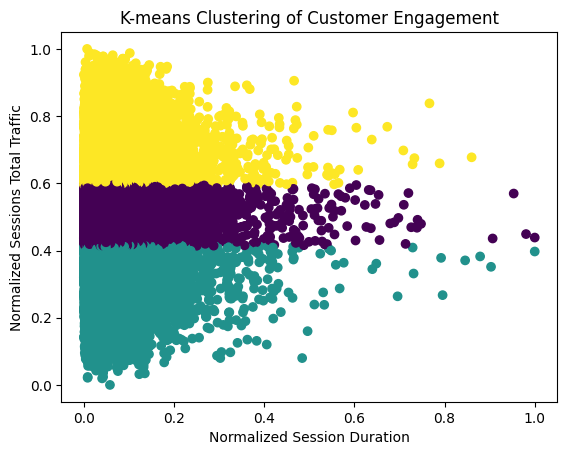

In [38]:
# Plot the k-means clusters
plot.kmeans_plot(df, colone='Normalized Session Duration', coltwo='Normalized Sessions Total Traffic', colthree='Engagement Group')

In [39]:
# Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

cluster_metrics = df.groupby('Engagement Group').agg({
    'Session Duration': ['min', 'max', 'mean', 'sum'],
    'Sessions Total Traffic': ['min', 'max', 'mean', 'sum']
})

print(cluster_metrics)

                 Session Duration                                          \
                              min        max           mean           sum   
Engagement Group                                                            
0                          7140.0  1859340.0  104681.873353  6.913400e+09   
1                          7140.0  1859340.0  104611.513801  4.320456e+09   
2                          7200.0  1600080.0  104493.895309  4.457605e+09   

                 Sessions Total Traffic                             \
                                    min          max          mean   
Engagement Group                                                     
0                            68245794.0   95622958.0  8.199001e+07   
1                             5733784.0   68245180.0  5.461682e+07   
2                            95621596.0  156662622.0  1.093777e+08   

                                
                           sum  
Engagement Group                
0                

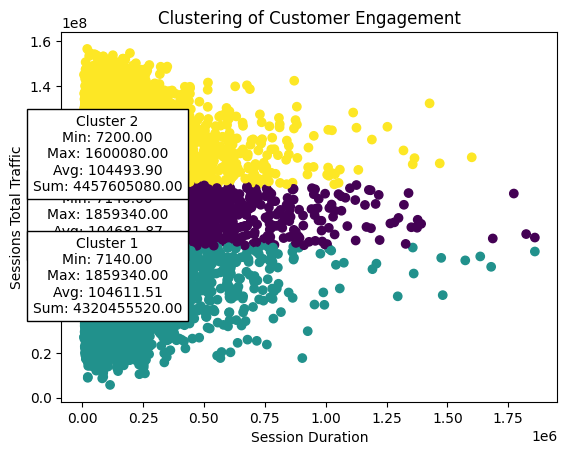

In [71]:
# Plot the clusters
plot.kmeans_minmaxavgclustering(df, "Session Duration", "Sessions Total Traffic", "Engagement Group", cluster_metrics)

In [ ]:
# Aggregate user total traffic per application and derive the top 10 most engaged users per application
total_data_volume.head()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0


In [ ]:
# Mapping between application columns and corresponding data columns
app_columns = {
    'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'Email': ['Email DL (Bytes)', 'Email UL (Bytes)'],
    'Youtube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}

# Group by MSISDN/Number and sum the traffic for each application
app_traffic = total_data_volume.groupby('MSISDN/Number').sum()

# Calculate total traffic per user
app_traffic['Total Traffic'] = app_traffic.sum(axis=1)

# Sort users based on total traffic in descending order
top_users = app_traffic.sort_values('Total Traffic', ascending=False)

# Get the top 10 most engaged users per application
top_10_engaged_users = {}
for app, columns in app_columns.items():
    app_traffic_app = top_users[columns].sum(axis=1)
    top_10_users = top_users[['Total Traffic']].copy()
    top_10_users['Application Traffic'] = app_traffic_app
    top_10_users = top_10_users.nlargest(10, 'Application Traffic')
    top_10_engaged_users[app] = top_10_users

# Print the top 10 most engaged users per application
for app, users in top_10_engaged_users.items():
    print(f"Top 10 Most Engaged Users for {app}:")
    print(users.head())
#print(top_10_engaged_users)

Top 10 Most Engaged Users for Social Media:
               Total Traffic  Application Traffic
MSISDN/Number                                    
3.362632e+10    9.896696e+11         2.017192e+09
3.376054e+10    1.310481e+10         3.978319e+07
3.365973e+10    1.388841e+10         3.541236e+07
3.361489e+10    1.634152e+10         2.829454e+07
3.362578e+10    1.470127e+10         2.713550e+07
Top 10 Most Engaged Users for Google:
               Total Traffic  Application Traffic
MSISDN/Number                                    
3.362632e+10    9.896696e+11         8.400769e+09
3.362578e+10    1.470127e+10         1.423079e+08
3.361489e+10    1.634152e+10         1.279738e+08
3.376054e+10    1.310481e+10         1.232231e+08
3.365973e+10    1.388841e+10         1.165163e+08
Top 10 Most Engaged Users for Email:
               Total Traffic  Application Traffic
MSISDN/Number                                    
3.362632e+10    9.896696e+11         2.442299e+09
3.361489e+10    1.634152e+10   

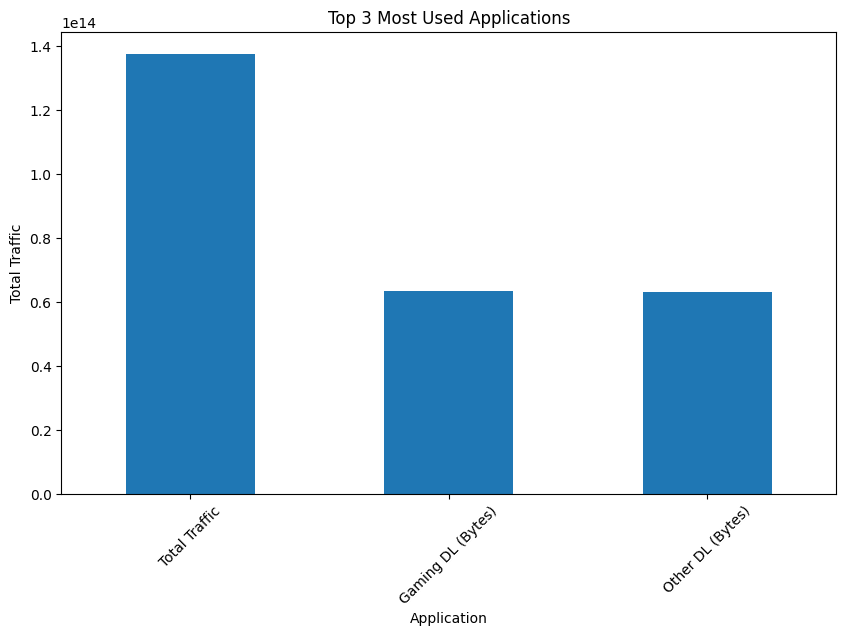

In [ ]:
# Get the top 3 most used applications
top_3_applications = app_traffic.sum().nlargest(3)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_3_applications.plot(kind='bar')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.xticks(rotation=45)
plt.show()

##  Experience Analytics

In [ ]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)',
       'MSISDN/Number', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming D

***
Task 4. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable): Average TCP retransmission
***

In [44]:
df['Average TCP retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df.groupby('MSISDN/Number')['Average TCP retransmission'].agg(lambda x: x.value_counts().index[0]).reset_index()

,MSISDN/Number,Average TCP retransmission
0,3.360100e+10,2.156957e+07
1,3.360100e+10,2.156957e+07
2,3.360100e+10,2.156957e+07
3,3.360101e+10,7.607247e+05
4,3.360101e+10,9.370832e+06
...,...,...
106851,3.379000e+10,2.180450e+05
106852,3.379000e+10,2.156957e+07
106853,3.197021e+12,2.156957e+07
106854,3.370000e+14,2.156957e+07


***
Task 4. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable): Average RTT
***

In [45]:
df['Average RTT'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df.groupby('MSISDN/Number')['Average RTT'].agg(lambda x: x.value_counts().index[0]).reset_index()

,MSISDN/Number,Average RTT
0,3.360100e+10,46.0
1,3.360100e+10,31.0
2,3.360100e+10,33.0
3,3.360101e+10,84.0
4,3.360101e+10,91.0
...,...,...
106851,3.379000e+10,52.0
106852,3.379000e+10,40.0
106853,3.197021e+12,33.0
106854,3.370000e+14,33.0


***
Task 4. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable): Average throughput
***

In [46]:
df['Average throughput'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']
df.groupby('MSISDN/Number')['Average throughput'].agg(lambda x: x.value_counts().index[0]).reset_index()

,MSISDN/Number,Average throughput
0,3.360100e+10,76.0
1,3.360100e+10,99.0
2,3.360100e+10,97.0
3,3.360101e+10,248.0
4,3.360101e+10,56781.0
...,...,...
106851,3.379000e+10,10365.0
106852,3.379000e+10,116.0
106853,3.197021e+12,1.0
106854,3.370000e+14,33.0


***
Task 4. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable): Handset Type
***

In [47]:
df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.value_counts().index[0]).reset_index()

,MSISDN/Number,Handset Type
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,Apple iPhone 7 (A1778)
2,3.360100e+10,undefined
3,3.360101e+10,Apple iPhone 5S (A1457)
4,3.360101e+10,Apple iPhone Se (A1723)
...,...,...
106851,3.379000e+10,Huawei Honor 9 Lite
106852,3.379000e+10,Apple iPhone 8 Plus (A1897)
106853,3.197021e+12,Quectel Wireless. Quectel Ec25-E
106854,3.370000e+14,Huawei B525S-23A


In [48]:
exp_aggregated_metrics = df.groupby('MSISDN/Number').agg({
    'Average TCP retransmission': 'sum',
    'Average RTT': 'sum',
    'Average throughput': 'sum',
    'Handset Type': 'sum'
})
exp_aggregated_metrics

,Average TCP retransmission,Average RTT,Average throughput,Handset Type
MSISDN/Number,,,,
3.360100e+10,2.156957e+07,46.0,76.0,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,2.156957e+07,31.0,99.0,Apple iPhone 7 (A1778)
3.360100e+10,2.156957e+07,33.0,97.0,undefined
3.360101e+10,7.607247e+05,84.0,248.0,Apple iPhone 5S (A1457)
3.360101e+10,3.094040e+07,119.0,56844.0,Apple iPhone Se (A1723)Apple iPhone Se (A1723)
...,...,...,...,...
3.379000e+10,2.180450e+05,52.0,10365.0,Huawei Honor 9 Lite
3.379000e+10,2.156957e+07,40.0,116.0,Apple iPhone 8 Plus (A1897)
3.197021e+12,2.156957e+07,33.0,1.0,Quectel Wireless. Quectel Ec25-E


***
Task 4.2 - Compute & list 10 of the top, bottom and most frequent: TCP values in the dataset.
***

In [49]:
tcp = exp_aggregated_metrics["Average TCP retransmission"].value_counts()
print(f'Top 10 TCP values in the dataset:{tcp.head(10)}')
print('')
print(f'Bottom 10 TCP values in the dataset:{tcp.tail(10)}')


Top 10 TCP values in the dataset:Average TCP retransmission
2.156957e+07    47125
4.313915e+07     7468
6.470872e+07     1032
2.081121e+07      363
8.627829e+07      252
2.081124e+07      167
7.609887e+05      145
4.238078e+07       82
2.081123e+07       81
7.597507e+05       78
Name: count, dtype: int64

Bottom 10 TCP values in the dataset:Average TCP retransmission
6.329708e+07    1
4.131383e+08    1
2.213379e+07    1
4.492933e+08    1
2.693000e+03    1
4.369370e+07    1
1.164008e+06    1
6.583276e+06    1
1.432130e+06    1
2.180450e+05    1
Name: count, dtype: int64


***
Task 4.2 - Compute & list 10 of the top, bottom and most frequent: RTT values in the dataset.
***

In [50]:
rtt = exp_aggregated_metrics["Average RTT"].value_counts()
print(f'Top 10 RTT values in the dataset:{rtt.head(10)}')
print('')
print(f'Bottom 10 RTT values in the dataset:{rtt.tail(10)}')

Top 10 RTT values in the dataset:Average RTT
33.0    17030
29.0     2739
66.0     2468
39.0     2162
38.0     1446
30.0     1422
40.0     1383
28.0     1330
49.0     1195
31.0     1054
Name: count, dtype: int64

Bottom 10 RTT values in the dataset:Average RTT
2413.0     1
10881.0    1
982.0      1
1590.0     1
6267.0     1
9642.0     1
6935.0     1
2967.0     1
5892.0     1
1449.0     1
Name: count, dtype: int64


***
Task 4.2 - Compute & list 10 of the top, bottom and most frequent: Throughput values in the dataset.
***

In [51]:
throughput = exp_aggregated_metrics["Average throughput"].value_counts()
print(f'Top 10 Throughput values in the dataset:{throughput.head(10)}')
print('')
print(f'Bottom 10 Throughput values in the dataset:{throughput.tail(10)}')

Top 10 Throughput values in the dataset:Average throughput
15.0    2685
63.0    2072
97.0    1023
90.0    1005
98.0     971
96.0     866
99.0     853
89.0     817
95.0     798
91.0     793
Name: count, dtype: int64

Bottom 10 Throughput values in the dataset:Average throughput
31567.0     1
52439.0     1
58899.0     1
56605.0     1
84397.0     1
50520.0     1
60807.0     1
351194.0    1
102481.0    1
10365.0     1
Name: count, dtype: int64


Task 4.3 - Compute & report:
The distribution of the average throughput  per handset type and provide interpretation for your findings.


In [52]:
average_throughput_distribution = df.groupby('Handset Type')['Average throughput'].mean()
average_throughput_distribution = average_throughput_distribution.sort_values(ascending=False)
average_throughput_distribution

Handset Type
Huawei B715S-23C                    108994.230769
New-Bund Technol. Mix 2             105211.000000
Lg G6+                              100135.000000
Zyxel Communicat. Sbg3600            97351.000000
Huawei Y9 2019                       91739.000000
                                        ...      
Samsung Gt-S6310N                        2.000000
Quectel Wireless. Quectel Ec21-E         2.000000
Quectel Wireless. Quectel Ec25-E         1.000000
Lg Lg-T385                               0.000000
Wct Uno                                  0.000000
Name: Average throughput, Length: 1396, dtype: float64

The device with the highest average throughput refers to the handset type or device model that, on average, achieved the highest throughput for data transmission. Throughput represents the rate at which data is transmitted or received over a network, typically measured in bits per second (bps) or kilobits per second (kbps).

By sorting the average throughput distribution in descending order and examining the device with the highest average throughput, you can identify the handset type that, on average, demonstrated the best performance in terms of data transmission speed. This information can be valuable for various purposes, such as understanding device capabilities, network optimization, or making informed decisions related to device selection or network planning.

***
Task 4.3 - Compute & report:
The average TCP retransmission view per handset type and provide interpretation for your findings.
***

In [53]:
average_tcpretransmission_distribution = df.groupby('Handset Type')['Average TCP retransmission'].mean()
average_tcpretransmission_distribution = average_tcpretransmission_distribution.sort_values(ascending=False)
average_tcpretransmission_distribution

Handset Type
Lg Lg-H635                             9.125491e+08
Huawei Bln-Al10                        3.291746e+08
Asustek Asus Zenfone Selfie Zd551Kl    3.216583e+08
Samsung Galaxy Tab S3 (Sm-T825)        2.027963e+08
Huawei E5776S-32                       1.688294e+08
                                           ...     
Oppo A37F                              2.377000e+03
Lenovo Moto X Play                     1.817000e+03
Gotron (Hk) Elec. Armor X              1.500000e+03
Samsung Galaxy Note 8 (Sm-N9500)       4.180000e+02
Casper Bilgisaya. Via M1               3.600000e+02
Name: Average TCP retransmission, Length: 1396, dtype: float64

A device with the highest average TCP retransmission indicates that, on average, this particular device experienced a higher number of TCP packet retransmissions during data transmission compared to other devices.

TCP retransmission occurs when a transmitted packet is not acknowledged by the receiver or if the sender detects packet loss. In such cases, the sender retransmits the packet to ensure reliable data delivery. High average TCP retransmission can be an indication of network congestion, poor signal quality, or other factors that may negatively impact the reliability and efficiency of data transmission for that device.

Identifying the device with the highest average TCP retransmission can be useful for troubleshooting network issues, identifying problematic devices, or optimizing network performance. By investigating further, network administrators or operators can take appropriate measures to improve the network conditions, address potential issues, or provide better support to the device experiencing high TCP retransmission.

***
Task 4.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)
***

In [54]:
scaler = MinMaxScaler()
exp_normalized_metrics = scaler.fit_transform(df[['Average TCP retransmission', 'Average RTT', 'Average throughput']])
df['Average TCP retransmission'] = exp_normalized_metrics[:, 0]
df['Average RTT'] = exp_normalized_metrics[:, 1]
df['Average throughput'] = exp_normalized_metrics[:, 2]
#df['Handset Type'] = exp_normalized_metrics[:, 3]

# Run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Experience Group'] = kmeans.fit_predict(exp_normalized_metrics)

# Print the customer classification
print(df[['MSISDN/Number', 'Experience Group']])

        MSISDN/Number  Experience Group
0        3.366496e+10                 1
1        3.368185e+10                 1
2        3.376063e+10                 1
3        3.375034e+10                 1
4        3.369980e+10                 1
...               ...               ...
149996   3.365069e+10                 1
149997   3.366345e+10                 1
149998   3.362189e+10                 1
149999   3.361962e+10                 1
150000   3.362632e+10                 1

[150001 rows x 2 columns]


In [55]:
exp_aggregated_metrics.columns

Index(['Average TCP retransmission', 'Average RTT', 'Average throughput',
       'Handset Type'],
      dtype='object')

In [56]:
# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
features =['Average TCP retransmission', 'Average RTT', 'Average throughput']
raw_data = exp_aggregated_metrics[features]
print(raw_data.shape)

# # Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# # Notes:
# # We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()


(106856, 3)
(106856, 87085)


,Average TCP retransmission_97.0,Average TCP retransmission_128.0,Average TCP retransmission_129.0,Average TCP retransmission_134.0,Average TCP retransmission_143.0,Average TCP retransmission_176.0,Average TCP retransmission_177.0,Average TCP retransmission_179.0,Average TCP retransmission_182.0,Average TCP retransmission_189.0,...,Average throughput_549661.0,Average throughput_550352.0,Average throughput_564179.0,Average throughput_618797.0,Average throughput_676858.0,Average throughput_690815.0,Average throughput_798342.0,Average throughput_840424.0,Average throughput_902222.0,Average throughput_18184571.0
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.360100e+10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3.360100e+10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3.360100e+10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3.360101e+10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3.360101e+10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


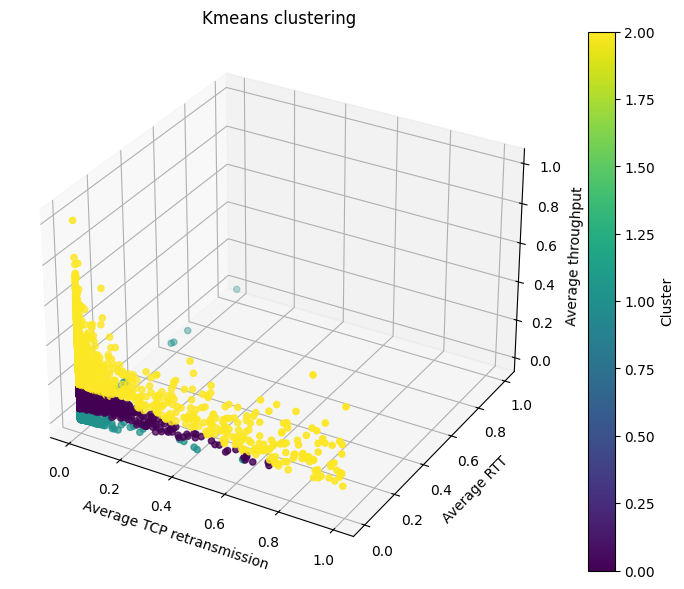

In [57]:
plot.kmeans_plot_heat_experiment(df, colone='Average TCP retransmission', coltwo='Average RTT', colthree='Average throughput', colfour='Experience Group')

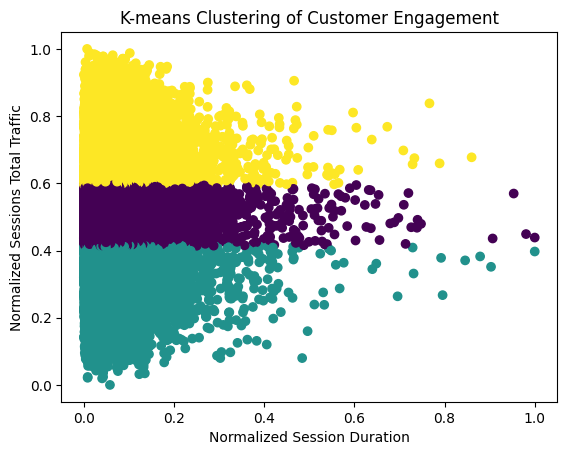

In [58]:
plot.kmeans_plot(df, colone='Normalized Session Duration', coltwo='Normalized Sessions Total Traffic', colthree='Engagement Group')

In [ ]:
# clean_df['Total TCP'] = clean_df['TCP UL Retrans. Vol (Bytes)'] + clean_df['TCP DL Retrans. Vol (Bytes)']
# clean_df['Total RTT'] = clean_df['Avg RTT DL (ms)'] + clean_df['Avg RTT UL (ms)']
# clean_df['Total Throughput'] = clean_df['Avg Bearer TP DL (kbps)'] + clean_df['Avg Bearer TP UL (kbps)']

# engagement_metrics = ['Total TCP', 'Total RTT', 'Total Throughput']
# for metric in engagement_metrics:
#     clean_df = replace_with_mean(clean_df, metric)

# # Normalize the engagement metrics
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(clean_df[engagement_metrics])

# # Run k-means clustering
# kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
# clusters = kmeans.fit_predict(normalized_data)
# # Add the cluster labels to the DataFrame
# clean_df['Engagement Cluster'] = clusters
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(clean_df['Total TCP'], 
#                      clean_df['Total RTT'], 
#                      clean_df['Total Throughput'], 
#                      c=clusters, 
#                      cmap='viridis')

# ax.set_title('Customer Engagement Clusters')
# ax.set_xlabel('Total TCP')
# ax.set_ylabel('Total RTT')
# ax.set_zlabel('Total Throughput')

# cbar = plt.colorbar(scatter)
# cbar.set_label('Cluster')

# plt.show()

## Satisfaction Analysis

Engagement Score:
'Bearer Id': This column may not be directly relevant for calculating the engagement score.
'Dur. (ms)': The duration of the session can be a factor in determining user engagement.
'Activity Duration DL (ms)': The duration of data activity on the downlink can also contribute to user engagement.
'Activity Duration UL (ms)': The duration of data activity on the uplink can also contribute to user engagement.
'Sessions Total Traffic': The total traffic generated during the sessions can provide insights into user engagement.

Experience Score (Satisfaction Score):
'Avg RTT DL (ms)': The average round-trip time on the downlink can be an indicator of network performance and user experience.
'Avg RTT UL (ms)': The average round-trip time on the uplink can be an indicator of network performance and user experience.
'Avg Bearer TP DL (kbps)': The average bearer throughput on the downlink can contribute to user experience.
'Avg Bearer TP UL (kbps)': The average bearer throughput on the uplink can contribute to user experience.
'TCP DL Retrans. Vol (Bytes)': The volume of TCP downlink retransmission can indicate network congestion and affect user experience.
'TCP UL Retrans. Vol (Bytes)': The volume of TCP uplink retransmission can indicate network congestion and affect user experience.
'Email DL (Bytes)': The amount of data downloaded for email applications can provide insights into user experience.
'Email UL (Bytes)': The amount of data uploaded for email applications can provide insights into user experience.
'Youtube DL (Bytes)': The amount of data downloaded from YouTube can be an indicator of user experience.
'Youtube UL (Bytes)': The amount of data uploaded to YouTube can be an indicator of user experience.
'Netflix DL (Bytes)': The amount of data downloaded from Netflix can be an indicator of user experience.
'Netflix UL (Bytes)': The amount of data uploaded to Netflix can be an indicator of user experience.
'Gaming DL (Bytes)': The amount of data downloaded for gaming applications can provide insights into user experience.
'Gaming UL (Bytes)': The amount of data uploaded for gaming applications can provide insights into user experience.
'Other DL (Bytes)': The amount of data downloaded for other applications can contribute to user experience.


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Assuming you have already performed clustering and obtained the cluster centroids
less_engaged_cluster_centroid = np.array([x1, y1])  # Replace with the centroid coordinates of the less engaged cluster
worst_experience_cluster_centroid = np.array([x2, y2])  # Replace with the centroid coordinates of the worst experience cluster

# Assuming you have a DataFrame 'df' with user data including the relevant columns

# Calculate engagement score and experience score for each user
engagement_scores = []
experience_scores = []

for index, row in df.iterrows():
    user_data_point = np.array([row['Feature1'], row['Feature2']])  # Replace 'Feature1' and 'Feature2' with the relevant columns
    
    # Calculate Euclidean distance between the user data point and less engaged cluster centroid
    engagement_score = distance.euclidean(user_data_point, less_engaged_cluster_centroid)
    engagement_scores.append(engagement_score)
    
    # Calculate Euclidean distance between the user data point and worst experience cluster centroid
    experience_score = distance.euclidean(user_data_point, worst_experience_cluster_centroid)
    experience_scores.append(experience_score)

# Assign engagement scores and experience scores to each user in the DataFrame
df['Engagement Score'] = engagement_scores
df['Experience Score'] = experience_scores

NameError: name 'x1' is not defined